<a href="https://colab.research.google.com/github/dhairya-2005/Predictive-Maintainence/blob/main/PredictiveMaintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np

In [48]:
dataset = pd.read_csv("https://raw.githubusercontent.com/dhairya-2005/Predictive-Maintainence/main/Engine.csv?token=GHSAT0AAAAAACU2TICBBKFRU6CIQTE5IO4SZVYZGWA")

In [49]:
dataset.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [50]:
dataset.isnull().sum()

,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


In [51]:
dataset['Engine rpm'] = dataset['Engine rpm'] / dataset['Engine rpm'].max()

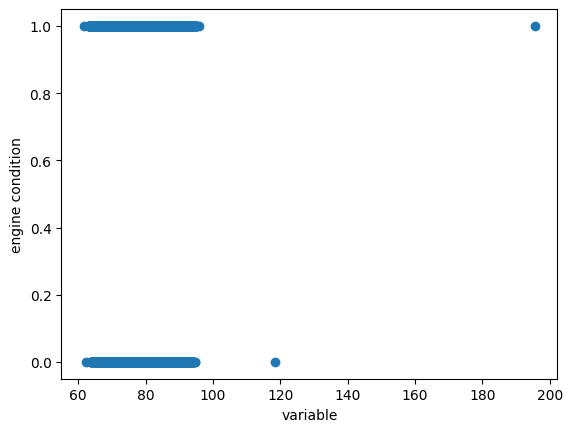

In [52]:
plt.xlabel("variable")
plt.ylabel("engine condition")
plt.scatter(dataset["Coolant temp"], dataset["Engine Condition"])

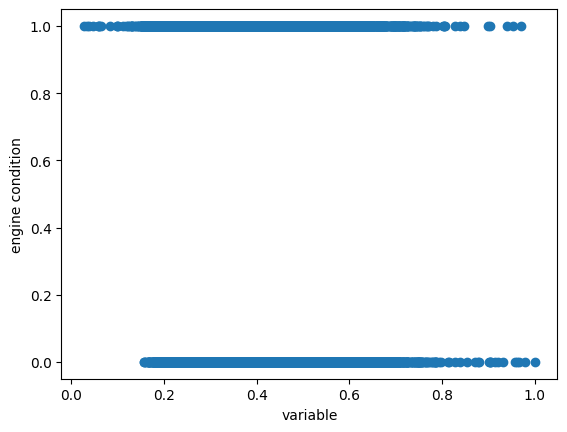

In [53]:
plt.xlabel("variable")
plt.ylabel("engine condition")
plt.scatter(dataset["Engine rpm"], dataset["Engine Condition"])

In [54]:
X = dataset.drop('Engine Condition', axis='columns')
y = dataset['Engine Condition']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
model.score(X_test, y_test)

0.6741745584847709

In [58]:
y_predicted = model.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 420,  966],
       [ 307, 2214]])

Text(95.72222222222221, 0.5, 'Truth')

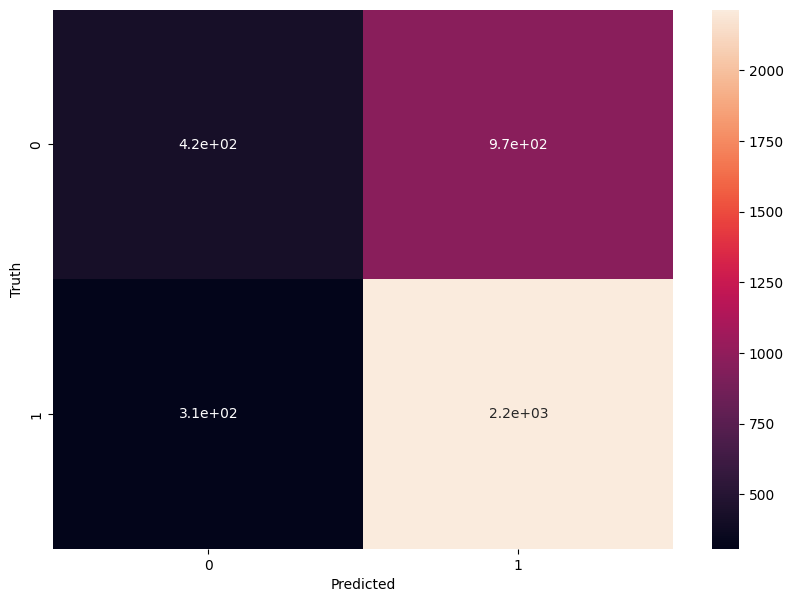

In [60]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
y_p = model.predict(X_test)
y_p[10]

0

In [62]:
new = np.array(y_test)
new[10]

1

In [63]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6452521115945739

In [64]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.6452521115945739

In [65]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.6452521115945739

In [80]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6480675710263629